## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [163]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc1


### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [166]:
train_images.shape

(60000, 28, 28)

In [167]:
len(train_labels)

60000

In [168]:
len(train_labels)

60000

In [169]:
test_images.shape

(10000, 28, 28)

In [170]:
len(test_labels)

10000

###5. Find dimensions of an image in the dataset

In [171]:
print("Dimention of an image in the dataset is ",train_images.shape[1:3])

Dimention of an image in the dataset is  (28, 28)


Inference: Dimension of Image is 28X28 based on above shape information

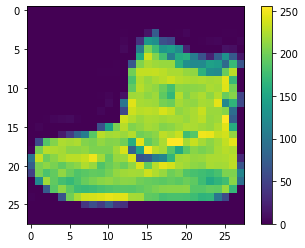

In [172]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 6. Verify if existing labels/Classes are correct 

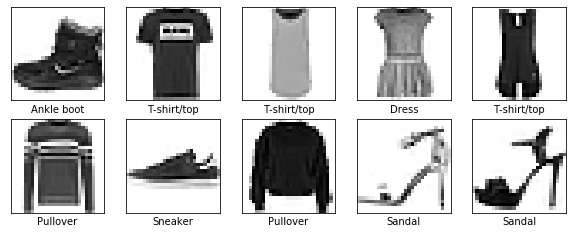

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
train_labels_encoded=tf.keras.utils.to_categorical(train_labels)

In [0]:
test_labels_encoded=tf.keras.utils.to_categorical(test_labels)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# convert from integers to floats
train_images_norm = train_images.astype('float32')
test_images_norm = test_images.astype('float32')
# normalize to range 0-1
train_images_norm = train_images_norm / 255.0
test_images_norm = test_images_norm / 255.0
# return normalized images

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
from tensorflow.keras.backend import expand_dims
train_images_reshaped = train_images_norm.reshape((train_images_norm.shape[0], 28, 28, 1))
test_images_reshaped = test_images_norm.reshape((test_images_norm.shape[0], 28, 28, 1))

In [0]:
#using CNN
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add 1st hidden layer
model.add(Conv2D(32,kernel_size=(3,3)))
model.add(Activation('relu'))

#Add 2nd hidden layer
model.add(Conv2D(32,kernel_size=(3,3)))
model.add(Activation('relu'))

#Flatten the output
model.add(Flatten())

#Add Dense Layer
model.add(Dense(128))
model.add(Activation('relu'))

#Add OUTPUT layer
model.add(Dense(10, activation='softmax'))


In [181]:
#Compile the model using Adam
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)
model.fit(train_images_reshaped,train_labels_encoded,          
          validation_data=(train_images_reshaped,train_labels_encoded),
          epochs=10,
          batch_size=32, callbacks=[mckpt])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3733 - accuracy: 0.8668 - val_loss: 0.2453 - val_accuracy: 0.9106
Epoch 2/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2282 - accuracy: 0.9164 - val_loss: 0.1686 - val_accuracy: 0.9401
Epoch 3/10
60000/60000 [==============================] - 10s 158us/sample - loss: 0.1682 - accuracy: 0.9373 - val_loss: 0.1137 - val_accuracy: 0.9600
Epoch 4/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1168 - accuracy: 0.9569 - val_loss: 0.0773 - val_accuracy: 0.9722
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0792 - accuracy: 0.9710 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0504 - accuracy: 0.9813 - val_loss: 0.0323 - val_accuracy: 0.9882
Epoch 7/10
60000/60000 [=======================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [182]:
#using CNN
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model2 = Sequential()

#Add 1st conv layer
model2.add(Conv2D(32,kernel_size=(3,3)))
model2.add(Activation('relu'))


#Add 2nd conv layer
model2.add(Conv2D(32,kernel_size=(3,3)))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))

#Add max pool layer
model2.add(MaxPool2D(pool_size=(2,2)))

#Flatten the output
model2.add(Flatten())

#Add Dense Layer
model2.add(Dense(128))
model2.add(Activation('relu'))

#Add OUTPUT layer
model2.add(Dense(10, activation='softmax'))

#Compile the model using Adam
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model2.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)
model2.fit(train_images_reshaped,train_labels_encoded,          
          validation_data=(train_images_reshaped,train_labels_encoded),
          epochs=10,
          batch_size=32, callbacks=[mckpt])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3782 - accuracy: 0.8635 - val_loss: 0.2557 - val_accuracy: 0.9128
Epoch 2/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2444 - accuracy: 0.9097 - val_loss: 0.2045 - val_accuracy: 0.9287
Epoch 3/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1985 - accuracy: 0.9267 - val_loss: 0.1631 - val_accuracy: 0.9463
Epoch 4/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1649 - accuracy: 0.9387 - val_loss: 0.1413 - val_accuracy: 0.9510
Epoch 5/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1376 - accuracy: 0.9483 - val_loss: 0.1098 - val_accuracy: 0.9628
Epoch 6/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1126 - accuracy: 0.9572 - val_loss: 0.0896 - val_accuracy: 0.9720
Epoch 7/10
60000/60000 [=======================

###13. Verify accuracy of the model

> 

In [183]:
test_loss, test_acc = model2.evaluate(test_images_reshaped,  test_labels_encoded, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.2958 - accuracy: 0.9215

Test accuracy: 0.9215


In [184]:
test_loss, test_acc = model.evaluate(test_images_reshaped,  test_labels_encoded, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.5660 - accuracy: 0.9110

Test accuracy: 0.911


Inference: Model2 is performing better with 92% accuracy

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(train_images_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

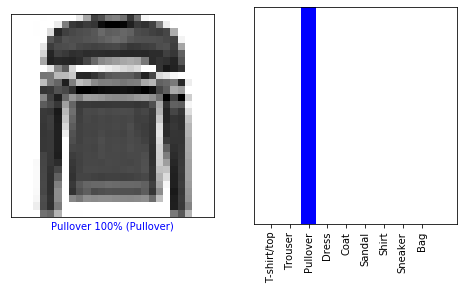

In [186]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], train_labels, train_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  train_labels)
plt.show()

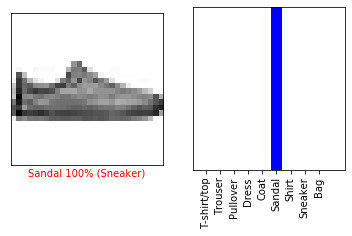

In [187]:
#checking for other values
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [191]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_images_reshaped)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(train_images_reshaped, train_labels_encoded, batch_size=32),
                    steps_per_epoch=len(train_images_reshaped) / 32, epochs=10)

  ...
    to  
  ['...']
Train for 1875.0 steps
Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4287 - accuracy: 0.8423
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4233 - accuracy: 0.8448
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4120 - accuracy: 0.8491
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4044 - accuracy: 0.8522
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3999 - accuracy: 0.8531
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3955 - accuracy: 0.8543
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3871 - accuracy: 0.8582
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3816 - accuracy: 0.8601
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3787 - accuracy: 0.8611
Epoch 10/10
1875/187

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

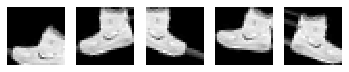

In [192]:
from matplotlib import pyplot as plt
gen = datagen.flow(train_images_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()